# Abstract

I will investigate the correlation between various variables in two merged datasets, encompassing data from 34 countries in the year 2019. I created the first dataset through the World Bank Open Data where it focuses primarily on mortality rates. It includes data on mortality rates among infants, females, and males, as well as rates attributed to unsafe water, unsafe sanitation, and lack of hygiene. Additionally, it contains data on the percentage of the population using basic and managed sanitation and drinking water services. The second data set was retrieved on Kaggle called the World Happiness Report. This set displays the happiness score of each country along with different variables such as GDP, social support, healthy life expectancy, freedom to make life choices, generosity, and corruption. I will only be exploring a few of these variables that can be seen in the Data section below. 

There will be four questions that I will be exploring from these datasets. 
1. Which variable attributes most to the happiness score? 
2. Are there correlations between mortality rates and the country's GDP and social support? 
3. Do the mortality rates attributed to unsafe water, unsafe sanitation, and lack of hygiene vary based on whether countries have more basic or managed sanitation and water drinking services? 
4. What regions have the largest mortality rates and do they correlate with the regions lack of clean water and safe hygiene practices? 


# Datasets

This section goes into more detail about the datasets that I will be using to answer my research questions. Here, I am cleaning, filtering, and merging both datasets into a final one. I will also determine the shape of the data and find out how many rows and columns I will have in total.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import statsmodels.formula.api as smf

In [2]:
# dataset 1
df_sanitation = pd.read_csv('sanitation-data.csv')
df_sanitation

,Country Name,Country Code,Time,Time Code,"Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population) [SH.STA.WASH.P5]",People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS],People using safely managed sanitation services (% of population) [SH.STA.SMSS.ZS],"Mortality rate, adult, female (per 1,000 female adults) [SP.DYN.AMRT.FE]","Mortality rate, adult, male (per 1,000 male adults) [SP.DYN.AMRT.MA]","Mortality rate, infant (per 1,000 live births) [SP.DYN.IMRT.IN]",GDP per capita (current US$) [NY.GDP.PCAP.CD],Level of water stress: freshwater withdrawal as a proportion of available freshwater resources [ER.H2O.FWST.ZS],People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS],People using safely managed drinking water services (% of population) [SH.H2O.SMDW.ZS],People with basic handwashing facilities including soap and water (% of population) [SH.STA.HYGN.ZS]
0,Afghanistan,AFG,2000.0,YR2000,..,20.9709193555198,..,290.083,355.447,90.6,..,54.7570194384,27.4418560941262,11.0933263091436,..
1,Afghanistan,AFG,2001.0,YR2001,..,20.9823486569015,..,284.871,349.36,88,..,54.7570194384,27.4735802318339,11.1052211474061,..
2,Afghanistan,AFG,2002.0,YR2002,..,22.5413387666176,..,282.338,331.54,85.4,182.174036617438,54.7570194384,29.6748627315109,12.0077331734354,..
3,Afghanistan,AFG,2003.0,YR2003,..,24.1003328260197,..,270.723,321.913,82.8,199.643227895834,54.7570194384,31.8755891610669,12.9099215252666,..
4,Afghanistan,AFG,2004.0,YR2004,..,25.6662399387279,..,264.795,313.483,80.1,221.830530720307,54.7570194384,34.0944312907889,13.8186837545214,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4994,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# renaming 
df_rename = df_sanitation.rename(columns={'Time':'Year',
    'Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population) [SH.STA.WASH.P5]': 'Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)',
    'People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS]': 'Using basic sanitation services (% of population)',
    'People using safely managed sanitation services (% of population) [SH.STA.SMSS.ZS]': 'Using safely managed sanitation services (% of population)',
    'Mortality rate, adult, female (per 1,000 female adults) [SP.DYN.AMRT.FE]': 'Mortality rate in female adults (per 1,000 female adults)',
    'Mortality rate, adult, male (per 1,000 male adults) [SP.DYN.AMRT.MA]': 'Mortality rate in male adults (per 1,000 male adults)',
    'Mortality rate, infant (per 1,000 live births) [SP.DYN.IMRT.IN]': 'Mortality rate in infants (per 1,000 live births)',
    'GDP per capita (current US$) [NY.GDP.PCAP.CD]': 'GDP per capita (current US$)',
    'Level of water stress: freshwater withdrawal as a proportion of available freshwater resources [ER.H2O.FWST.ZS]': 'Level of water stress: Available freshwater resources',
    'People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS]': 'Using basic drinking water services (% of population)',
    'People using safely managed drinking water services (% of population) [SH.H2O.SMDW.ZS]': 'Using safely managed drinking water services (% of population)',
    'People with basic handwashing facilities including soap and water (% of population) [SH.STA.HYGN.ZS]': 'Have basic handwashing facilities including soap and water (% of population)'
})

In [4]:
df_drop = df_rename.drop(columns=['Time Code']).dropna()
df_drop

,Country Name,Country Code,Year,"Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)",Using basic sanitation services (% of population),Using safely managed sanitation services (% of population),"Mortality rate in female adults (per 1,000 female adults)","Mortality rate in male adults (per 1,000 male adults)","Mortality rate in infants (per 1,000 live births)",GDP per capita (current US$),Level of water stress: Available freshwater resources,Using basic drinking water services (% of population),Using safely managed drinking water services (% of population),Have basic handwashing facilities including soap and water (% of population)
0,Afghanistan,AFG,2000.0,..,20.9709193555198,..,290.083,355.447,90.6,..,54.7570194384,27.4418560941262,11.0933263091436,..
1,Afghanistan,AFG,2001.0,..,20.9823486569015,..,284.871,349.36,88,..,54.7570194384,27.4735802318339,11.1052211474061,..
2,Afghanistan,AFG,2002.0,..,22.5413387666176,..,282.338,331.54,85.4,182.174036617438,54.7570194384,29.6748627315109,12.0077331734354,..
3,Afghanistan,AFG,2003.0,..,24.1003328260197,..,270.723,321.913,82.8,199.643227895834,54.7570194384,31.8755891610669,12.9099215252666,..
4,Afghanistan,AFG,2004.0,..,25.6662399387279,..,264.795,313.483,80.1,221.830530720307,54.7570194384,34.0944312907889,13.8186837545214,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4986,Zimbabwe,ZWE,2018.0,..,36.3571601293685,33.5442662380666,304.769,391.373,38,2269.17701232332,35.405385383,63.5387733496876,26.807938485019,42.4196422521729
4987,Zimbabwe,ZWE,2019.0,36.2,35.7743358079873,32.9614812425167,302.949,400.483,37.1,1421.86859613585,35.405385383,63.0949538019092,26.6839776541278,42.419838127544
4988,Zimbabwe,ZWE,2020.0,..,35.1923618234591,32.3812318684902,295.007,412.647,36.6,1372.69667436829,35.405385383,62.6664561104324,26.5738460316127,42.4261100052962
4989,Zimbabwe,ZWE,2021.0,..,34.6099502088038,31.8024372635234,326.282,456.323,35.7,1773.92041090285,..,62.2527975841627,26.4769953287703,42.4380646900694


In [5]:
# making all columns with values a numeric value
# adjusting year column to be a value 

df_drop['Year'] = df_drop['Year'].astype(str).str.replace('.0', '')
df_drop['Mortality rate in female adults (per 1,000 female adults)'] = pd.to_numeric(df_drop['Mortality rate in female adults (per 1,000 female adults)'], errors='coerce')
df_drop['Mortality rate in male adults (per 1,000 male adults)'] = pd.to_numeric(df_drop['Mortality rate in male adults (per 1,000 male adults)'], errors='coerce')
df_drop['Mortality rate in infants (per 1,000 live births)'] = pd.to_numeric(df_drop['Mortality rate in infants (per 1,000 live births)'], errors='coerce')
df_drop['GDP per capita (current US$)'] = pd.to_numeric(df_drop['GDP per capita (current US$)'], errors='coerce')
df_drop['Level of water stress: Available freshwater resources'] = pd.to_numeric(df_drop['Level of water stress: Available freshwater resources'], errors='coerce')
df_drop['Using basic drinking water services (% of population)'] = pd.to_numeric(df_drop['Using basic drinking water services (% of population)'], errors='coerce')
df_drop['Using safely managed drinking water services (% of population)'] = pd.to_numeric(df_drop['Using safely managed drinking water services (% of population)'], errors='coerce')
df_drop['Have basic handwashing facilities including soap and water (% of population)'] = pd.to_numeric(df_drop['Have basic handwashing facilities including soap and water (% of population)'], errors='coerce')
df_drop['Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)'] = pd.to_numeric(df_drop['Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)'], errors='coerce')
df_drop['Using basic sanitation services (% of population)'] = pd.to_numeric(df_drop['Using basic sanitation services (% of population)'], errors='coerce')
df_drop['Using safely managed sanitation services (% of population)'] = pd.to_numeric(df_drop['Using safely managed sanitation services (% of population)'], errors='coerce')

df_drop

,Country Name,Country Code,Year,"Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)",Using basic sanitation services (% of population),Using safely managed sanitation services (% of population),"Mortality rate in female adults (per 1,000 female adults)","Mortality rate in male adults (per 1,000 male adults)","Mortality rate in infants (per 1,000 live births)",GDP per capita (current US$),Level of water stress: Available freshwater resources,Using basic drinking water services (% of population),Using safely managed drinking water services (% of population),Have basic handwashing facilities including soap and water (% of population)
0,Afghanistan,AFG,2000,NaN,20.970919,NaN,290.083,355.447,90.6,NaN,54.757019,27.441856,11.093326,NaN
1,Afghanistan,AFG,2001,NaN,20.982349,NaN,284.871,349.360,88.0,NaN,54.757019,27.473580,11.105221,NaN
2,Afghanistan,AFG,2002,NaN,22.541339,NaN,282.338,331.540,85.4,182.174037,54.757019,29.674863,12.007733,NaN
3,Afghanistan,AFG,2003,NaN,24.100333,NaN,270.723,321.913,82.8,199.643228,54.757019,31.875589,12.909922,NaN
4,Afghanistan,AFG,2004,NaN,25.666240,NaN,264.795,313.483,80.1,221.830531,54.757019,34.094431,13.818684,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4986,Zimbabwe,ZWE,2018,NaN,36.357160,33.544266,304.769,391.373,38.0,2269.177012,35.405385,63.538773,26.807938,42.419642
4987,Zimbabwe,ZWE,2019,36.2,35.774336,32.961481,302.949,400.483,37.1,1421.868596,35.405385,63.094954,26.683978,42.419838
4988,Zimbabwe,ZWE,2020,NaN,35.192362,32.381232,295.007,412.647,36.6,1372.696674,35.405385,62.666456,26.573846,42.426110
4989,Zimbabwe,ZWE,2021,NaN,34.609950,31.802437,326.282,456.323,35.7,1773.920411,NaN,62.252798,26.476995,42.438065


In [6]:
# reordering the columns
reorder = ['Country Name', 'Country Code', 'Year','GDP per capita (current US$)',
              'Mortality rate in infants (per 1,000 live births)',
              'Mortality rate in female adults (per 1,000 female adults)', 
              'Mortality rate in male adults (per 1,000 male adults)',
              'Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)',
              'Level of water stress: Available freshwater resources', 
              'Have basic handwashing facilities including soap and water (% of population)',
              'Using basic sanitation services (% of population)', 
              'Using safely managed sanitation services (% of population)',
              'Using basic drinking water services (% of population)',
              'Using safely managed drinking water services (% of population)']

df_final_sanitation = df_drop[reorder]

In [7]:
# check for missing values
missing_values_sani= df_final_sanitation.isna().sum()
missing_values_sani

Country Name                                                                                                    0
Country Code                                                                                                    0
Year                                                                                                            0
GDP per capita (current US$)                                                                                  219
Mortality rate in infants (per 1,000 live births)                                                             679
Mortality rate in female adults (per 1,000 female adults)                                                     466
Mortality rate in male adults (per 1,000 male adults)                                                         466
Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)    4808
Level of water stress: Available freshwater resources                                   

In [8]:
df_final_sanitation.dropna().shape

(44, 14)

In [9]:
# dataset 2
df_happy = pd.read_csv('2019.csv')
df_happy

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [10]:
# check for missing values
missing_values_happy= df_happy.isna().sum()
missing_values_happy

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [11]:
# rename
df_happy19 = df_happy.rename(columns={'Country or region': 'Country Name', 
                                      'Score': 'Happy Score'})

In [12]:
# merging dataset 1 & 2 
df_merged = pd.merge(df_happy19, df_final_sanitation, on=['Country Name'], how="inner")

In [13]:
# FINAL DATATSET
df_final = df_merged.drop(columns=['Country Code','Freedom to make life choices',
                                   'Generosity','Year','GDP per capita (current US$)',
                                   'Perceptions of corruption','Level of water stress: Available freshwater resources']).dropna()
df_final.dropna().head()

,Overall rank,Country Name,Happy Score,GDP per capita,Social support,Healthy life expectancy,"Mortality rate in infants (per 1,000 live births)","Mortality rate in female adults (per 1,000 female adults)","Mortality rate in male adults (per 1,000 male adults)","Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)",Have basic handwashing facilities including soap and water (% of population),Using basic sanitation services (% of population),Using safely managed sanitation services (% of population),Using basic drinking water services (% of population),Using safely managed drinking water services (% of population)
272,12,Costa Rica,7.167,1.034,1.441,0.963,7.2,51.240,103.413,2.9,85.675518,97.853222,24.839966,99.797529,80.520684
502,23,Mexico,6.595,1.070,1.323,0.861,12.2,99.114,205.773,3.5,92.845159,90.776558,55.051934,99.115353,42.782744
847,41,Uzbekistan,6.174,0.745,1.529,0.756,13.8,116.272,198.130,2.9,81.622222,95.939218,74.407812,95.627436,76.774556
893,43,Colombia,6.125,0.985,1.410,0.841,11.8,73.515,142.284,3.4,69.724608,92.151092,18.034779,96.892525,73.271919
1054,50,Ecuador,6.028,0.912,1.312,0.868,11.5,81.821,141.688,4.7,87.150642,90.003241,41.900621,95.011225,66.609857


In [14]:
df_final.shape

(34, 15)

In [15]:
df_final_rows = 34
df_final_columns = 15

print("Rows:", df_final_rows)
print("Columns:", df_final_columns)

Rows: 34
Columns: 15


In [16]:
# calculate mean
mean_mortalityF = df_final['Mortality rate in female adults (per 1,000 female adults)'].mean()
mean_mortalityM = df_final['Mortality rate in male adults (per 1,000 male adults)'].mean()
mean_mortalityI = df_final['Mortality rate in infants (per 1,000 live births)'].mean()

print('Mean of Infants:', mean_mortalityI)
print('Mean of Femals:', mean_mortalityF)
print('Mean of Males:', mean_mortalityM)

Mean of Infants: 31.08823529411765
Mean of Femals: 163.09170588235295
Mean of Males: 237.52102941176474


In [17]:
# calculate media
median_mortalityF = df_final['Mortality rate in female adults (per 1,000 female adults)'].median()
median_mortalityM = df_final['Mortality rate in male adults (per 1,000 male adults)'].median()
median_mortalityI = df_final['Mortality rate in infants (per 1,000 live births)'].median()

print('Median of Infants:', median_mortalityI)
print('Median of Femals:', median_mortalityF)
print('Median of Males:', median_mortalityM)

Median of Infants: 24.9
Median of Femals: 123.7695
Median of Males: 209.4635


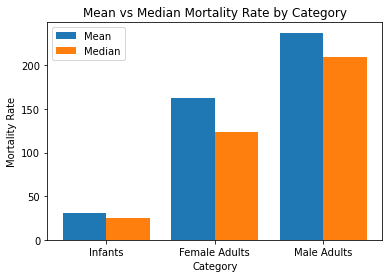

In [18]:
# categories
categories = ['Infants', 'Female Adults', 'Male Adults']

# mean mortality rates
mean_values = [mean_mortalityI, mean_mortalityF, mean_mortalityM]

# median mortality rates
median_values = [median_mortalityI, median_mortalityF, median_mortalityM]

# plotting
fig, ax = plt.subplots()
bar_width = 0.40
index = range(len(categories))

ax.bar(index, mean_values, bar_width, label='Mean')
ax.bar([i + bar_width for i in index], median_values, bar_width, label='Median')

ax.set_xlabel('Category')
ax.set_ylabel('Mortality Rate')
ax.set_title('Mean vs Median Mortality Rate by Category')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(categories)
ax.legend()

plt.show()


This visual barplot shows that the mean of infants, female adults, and male adults are higher than the median. 

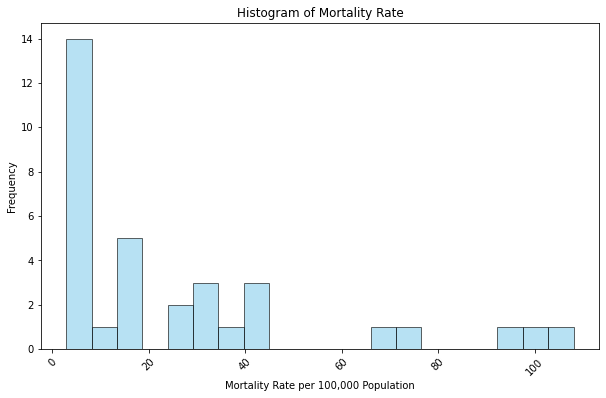

In [19]:
mortality_data = df_final['Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)']

# histogram
plt.figure(figsize=(10, 6)) 
plt.hist(mortality_data, bins=20, color='skyblue', edgecolor='black', alpha=.6) 
plt.xlabel('Mortality Rate per 100,000 Population')
plt.ylabel('Frequency')  
plt.title('Histogram of Mortality Rate') 
plt.xticks(rotation=45) 
plt.show() 

Although there are some gaps in between this dataset (which will go into more detail in the limitations), it can be seen that the mortality rate is right-skewed. This corresponds to the barplot above illustrating that the mean of mortality rates attributed to unsafe water, unsafe sanitation, and lack of hygiene is higher than the median.

# Visualizations

This section visualizes and highlights specific fields of the dataset that I believe was important to note. 

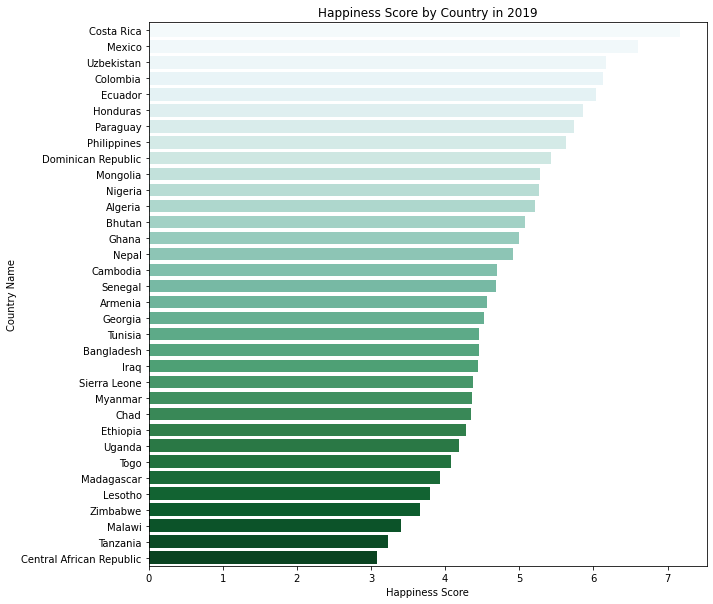

In [20]:
# happiness score with largest first
plt.figure(figsize=(10,10))
sns.barplot(data=df_final, x='Happy Score',y='Country Name', palette="BuGn")
plt.xlabel("Happiness Score")
plt.ylabel("Country Name")
plt.title("Happiness Score by Country in 2019")
plt.show()

This barplot shows the country ranked from having the highest ranking in happiness score to the lowest ranking. The color also gradually gets darker as the ranking goes lower. At first glance, we can see that Costa Rica has the highest rank followed by Mexico. Now if we look closer, the top 10 countries seem to be in the Central/South America region. However, the top 10 of the bottom rank seem to be in the African region. Given their historical and political context, I know that many countries in the African region are more impoverish and corrupted therefore it makes sense that these countries are placed lower in rank. Although it is important to note that countries in Central/South America are not far off in terms of poverty and corruption. The ranks in between consists of countries in the Middle East with a few from Asia.

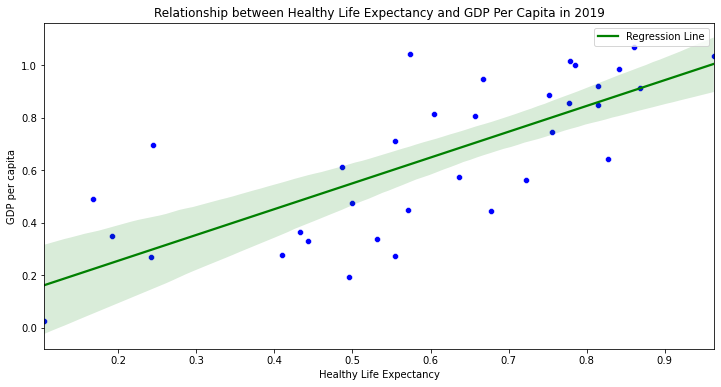

In [22]:
plt.figure(figsize=(12, 6))

# scatter plot of health life expectancy vs. attributed to unsafe water
sns.scatterplot(data=df_final, x='Healthy life expectancy', y='GDP per capita', color='blue')

# adding regression line
sns.regplot(data=df_final, x='Healthy life expectancy', y='GDP per capita', scatter=False, color='green', label='Regression Line')


plt.xlabel('Healthy Life Expectancy')
plt.ylabel('GDP per capita')
plt.title('Relationship between Healthy Life Expectancy and GDP Per Capita in 2019')


plt.legend()
plt.show()

The scatterplot shows a positive relationship between Healthy Life Expectancy and the country's GDP. As the GDP per capita rises, so does the increase in life expectancy. This makes sense in that country's with higher GDP's are able to support their population more thus resulting in better health of their people.

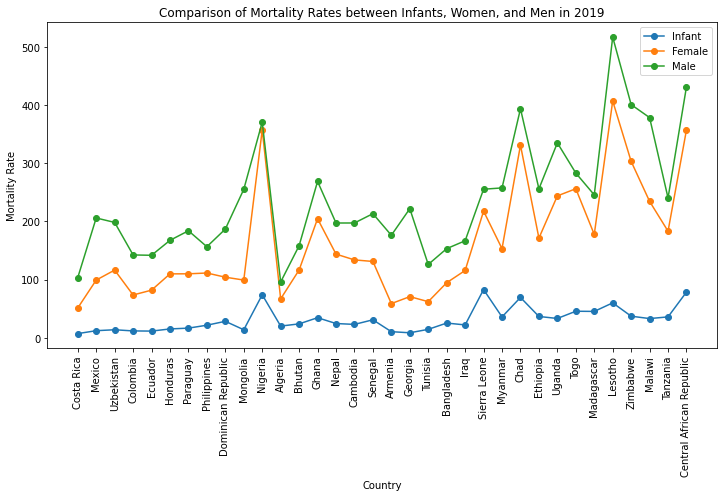

In [23]:
plt.figure(figsize=(12, 6))

country_names = df_final['Country Name'].values
infant_mortality = df_final['Mortality rate in infants (per 1,000 live births)'].values
male_mortality = df_final['Mortality rate in male adults (per 1,000 male adults)'].values
female_mortality = df_final['Mortality rate in female adults (per 1,000 female adults)'].values

# plotting mortality rate of men and women
plt.plot(country_names, infant_mortality, label='Infant', marker='o')
plt.plot(country_names, female_mortality, label='Female', marker='o')
plt.plot(country_names, male_mortality, label='Male', marker='o')


plt.xlabel('Country')
plt.ylabel('Mortality Rate')
plt.title('Comparison of Mortality Rates between Infants, Women, and Men in 2019')
plt.xticks(rotation=90)
plt.legend()


plt.show()

The lineplot above illustrates a comparison of mortality rates between infants, women, and men. It can be seen that men generally have higher mortality rates compared to women in all countries. Upon looking closer, there are sharp increases in African countries while mortality rates in other countries tend to be lower. This correlates with the happiness score barplot where most African countries had the lowest rank in happiness. Could the high rate in mortality rates be one of the leading causes to the low happiness ranking of the people?

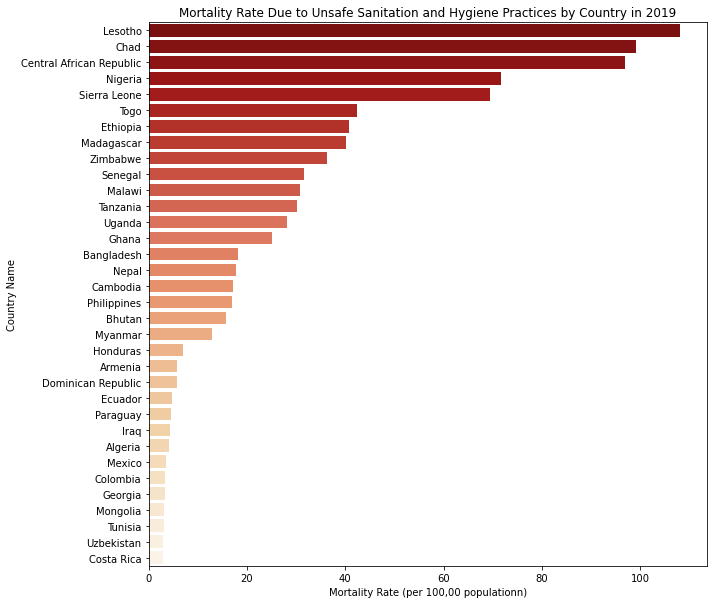

In [24]:
# mortality rate highest to lowest
df_final_sorted = df_final.sort_values(by='Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)',ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(data=df_final_sorted, x='Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)',y='Country Name', palette='OrRd_r')
plt.xlabel("Mortality Rate (per 100,00 populationn)")
plt.ylabel("Country Name")
plt.title("Mortality Rate Due to Unsafe Sanitation and Hygiene Practices by Country in 2019")
plt.show()

Now, I am taking more closer look in mortality rates that are attributed to unsafe sanitation and hygeine practices. Using the barplot, it is evident that the top 10 countries with higher rates are from the African region. This may also correlate to the huge number in mortality rates in these countries as well.

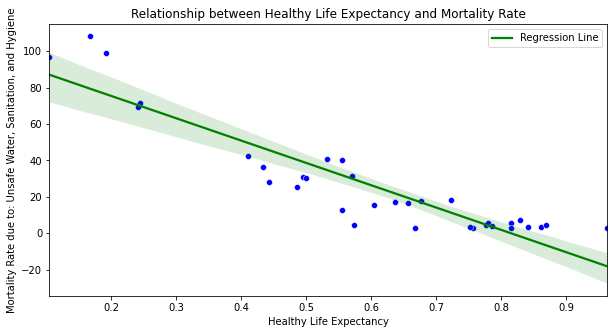

In [25]:
plt.figure(figsize=(10, 5))

# scatter plot of health life expectancy vs. attributed to unsafe water
sns.scatterplot(data=df_final, x='Healthy life expectancy', y='Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)', color='blue')

# adding regression line
sns.regplot(data=df_final, x='Healthy life expectancy', y='Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)', scatter=False, color='green', label='Regression Line')


plt.xlabel('Healthy Life Expectancy')
plt.ylabel('Mortality Rate due to: Unsafe Water, Sanitation, and Hygiene')
plt.title('Relationship between Healthy Life Expectancy and Mortality Rate')


plt.legend()
plt.show()

The scatterplot illustrates the relationship between healthy life expectancy and mortality rate due to unsafe water, sanitation, and lack of hygiene. It can be seen that there is also a relationship between these two variables. As the mortality rate due to lack of clean water and sanitation decreases, the healthy life expectancy increases.

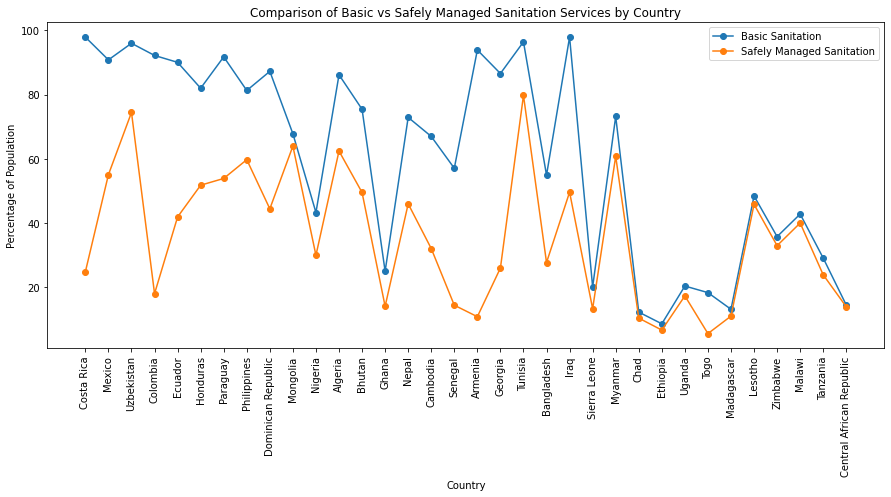

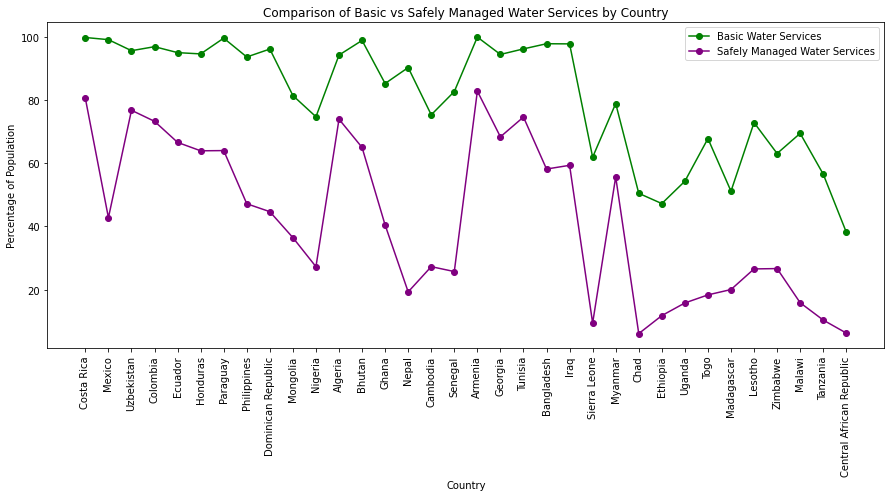

In [26]:
# basic and managed sanitation
plt.figure(figsize=(15, 6))
country_names = df_final['Country Name'].values
basic_sanitation = df_final['Using basic sanitation services (% of population)'].values
managed_sanitation = df_final['Using safely managed sanitation services (% of population)'].values


# plotting the comparison
plt.plot(country_names, basic_sanitation, label='Basic Sanitation', marker='o')
plt.plot(country_names, managed_sanitation, label='Safely Managed Sanitation', marker='o')


plt.xlabel('Country')
plt.ylabel('Percentage of Population')
plt.title('Comparison of Basic vs Safely Managed Sanitation Services by Country')
plt.xticks(rotation=90)
plt.legend()


plt.show()

# basic and managed waterr
plt.figure(figsize=(15, 6))
country_names = df_final['Country Name'].values
basic_drink = df_final['Using basic drinking water services (% of population)'].values
managed_drink = df_final['Using safely managed drinking water services (% of population)'].values

# plotting the comparison
plt.plot(country_names, basic_drink, label='Basic Water Services', marker='o', color='green')
plt.plot(country_names, managed_drink, label='Safely Managed Water Services', marker='o', color='purple')

plt.xlabel('Country')
plt.ylabel('Percentage of Population')
plt.title('Comparison of Basic vs Safely Managed Water Services by Country')
plt.xticks(rotation=90)
plt.legend()


plt.show()

Both lineplots illustrate a stark contrast between basic and safely managed sanitation and water services across countries. It can be seen that there seems to be more basic water services when comparing to basic sanitation. However, managed sanitation and safely managed water seem to be about the same. It is also important to highlight that Costa Rica, Colombia, and Armenia exhibit significant disparities, with basic services far outnumbering managed ones. This might raise some more questions in regards to their economy such as corruption, poverty levels, and political unrest. Moreover, the closeness of basic and managed sanitation services in African countries, compared to water services, suggests regional nuances in access.

# Analyses 

The analyses portion will showcase how these two dataset either correlate or not correlate with one another through linear and multi regressions as well as sample train testing.  

In [28]:
mod_happy = smf.ols(formula="Q('Happy Score') ~ Q('GDP per capita') + Q('Social support') + Q('Healthy life expectancy')", data=df_final).fit()

mod_happy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Q('Happy Score')   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     21.35
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           1.35e-07
Time:                        19:44:39   Log-Likelihood:                -26.937
No. Observations:                  34   AIC:                             61.87
Df Residuals:                      30   BIC:                             67.98
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        2.2809      0.363      6.290      0.000       1.540       3.022
Q('GDP per capita')              0.9101      0.559      1.627      0.114      -0.232       2.052
Q('Social support')              1.2477      0.430      2.900      0.007       0.369       2.126
Q('Healthy life expectancy')     1.0261      0.686      1.497      0.145      -0.374       2.426
==============================================================================
Omnibus:                        1.341   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.511   Jarque-Bera (JB):                0.992
Skew:                           0.106   Prob(JB):                        0.609
Kurtosis:                       2.191   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0.5413326620334618
0.5593088576953436
0.4881998667168548


Text(0.5, 1.0, 'Modeling Happiness: Predictors and Their Contribution')

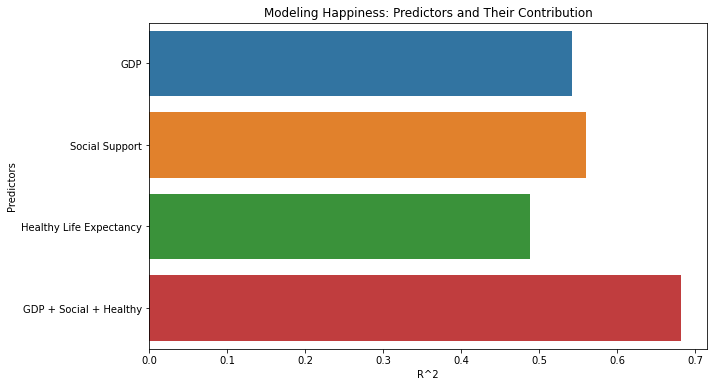

In [29]:
# r2 predictors of GDP, social, health, and all
mod_gdp = smf.ols(data = df_final,
                     formula = "Q('Happy Score') ~ Q('GDP per capita')").fit()
mod_social = smf.ols(data = df_final,
                     formula = "Q('Happy Score') ~ Q('Social support')").fit()
mod_healthy = smf.ols(data = df_final,
                     formula = "Q('Happy Score') ~ Q('Healthy life expectancy')").fit()

print(mod_gdp.rsquared)
print(mod_social.rsquared)
print(mod_healthy.rsquared)

plt.figure(figsize=(10, 6))
df_r2 = pd.DataFrame({'R^2': [mod_gdp.rsquared, mod_social.rsquared, mod_healthy.rsquared, mod_happy.rsquared],
                     'Predictors': ['GDP', 'Social Support', 'Healthy Life Expectancy', 'GDP + Social + Healthy']})
sns.barplot(data=df_r2, y="Predictors", x="R^2")
plt.title("Modeling Happiness: Predictors and Their Contribution")

The R-squared value of the happiness model indicates that the predictors—social support, GDP per capita, and healthy life expectancy—explain a substantial portion of the variance in happiness scores. Specifically, social support contributes the most to explaining happiness, followed by GDP per capita and healthy life expectancy. The high number in social support suggests that fostering strong social networks and supportive relationships may have a profound impact on individual happiness levels. However, when considering all predictors together, the combined effect on happiness is maximized, indicating a comprehensive understanding of the factors influencing overall well-being.

In [30]:
mod_mortality = smf.ols(formula="Q('Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)') ~ Q('GDP per capita') + Q('Social support')", data=df_final).fit()
mod_mortality.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                                          OLS Regression Results                                                                          
==========================================================================================================================================================================
Dep. Variable:     Q('Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)')   R-squared:                       0.506
Model:                                                                                                                        OLS   Adj. R-squared:                  0.474
Method:                                                                                                             Least Squares   F-statistic:                     15.88
Date:                                                                                                            Tue, 09 Apr 2024   Prob (F-statistic):           1.79e-05
Time:                                                                                                                    19:45:01   Log-Likelihood:                -151.10
No. Observations:                                                                                                              34   AIC:                             308.2
Df Residuals:                                                                                                                  31   BIC:                             312.8
Df Model:                                                                                                                       2                                         
Covariance Type:                                                                                                        nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              80.9890     13.194      6.138      0.000      54.080     107.898
Q('GDP per capita')   -61.4295     17.378     -3.535      0.001     -96.872     -25.986
Q('Social support')   -13.5507     15.932     -0.851      0.402     -46.044      18.942
==============================================================================
Omnibus:                       25.309   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.914
Skew:                           1.927   Prob(JB):                     7.91e-10
Kurtosis:                       6.839   Cond. No.                         9.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0.494535898149428
0.3069691448039059


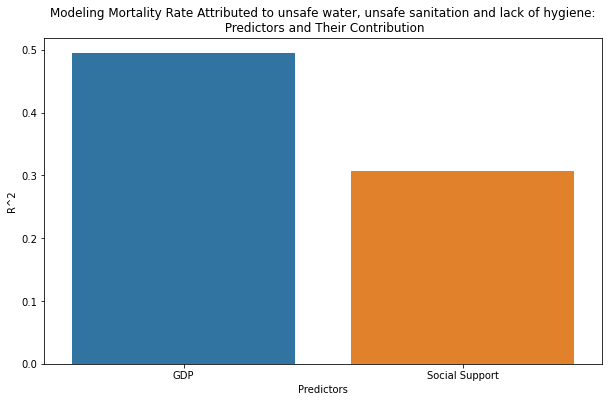

In [31]:
# r2 predictors of GDP and Social
mod_gdp = smf.ols(data = df_final,
                     formula = "Q('Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)') ~ Q('GDP per capita')").fit()
mod_social = smf.ols(data = df_final,
                     formula = "Q('Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)') ~ Q('Social support')").fit()

print(mod_gdp.rsquared)
print(mod_social.rsquared)

plt.figure(figsize=(10, 6))
df_r2 = pd.DataFrame({'R^2': [mod_gdp.rsquared, mod_social.rsquared],
                     'Predictors': ['GDP', 'Social Support']})
sns.barplot(data=df_r2, x="Predictors", y="R^2")
import matplotlib.pyplot as plt


plt.title("Modeling Mortality Rate Attributed to unsafe water, unsafe sanitation and lack of hygiene:\n Predictors and Their Contribution")


plt.show()

In exploring the relationship between social support and GDP with mortality rates attributed to unsafe water, sanitation, and lack of hygiene, focusing on the two highest-rated factors provides insights into their potential impact on public health outcomes. By examining how these factors correlate with mortality rates, particularly with GDP, we can gain a deeper understanding of the relative importance of socio-economic factors in addressing health challenges associated with inadequate water, sanitation, and hygiene infrastructure.

In [32]:
# AIC VALUES
mod_basic_sani = smf.ols(formula="Q('Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)') ~ Q('Using basic sanitation services (% of population)')", data=df_final).fit()
mod_managed_sani = smf.ols(formula="Q('Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)') ~ Q('Using safely managed sanitation services (% of population)')", data=df_final).fit()

print("AIC for Basic Sanitation Services:", mod_basic_sani.aic)
print("AIC for Safely Managed Sanitation Services:", mod_managed_sani.aic)

AIC for Basic Sanitation Services: 303.1874181878293
AIC for Safely Managed Sanitation Services: 322.13668447377705


In [33]:
# AIC VALUES
mod_basic_water = smf.ols(formula="Q('Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)') ~ Q('Using basic drinking water services (% of population)')", data=df_final).fit()
mod_managed_water = smf.ols(formula="Q('Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)') ~ Q('Using safely managed drinking water services (% of population)')", data=df_final).fit()

print("AIC for Basic Drinking Water Services:", mod_basic_water.aic)
print("AIC for Safely Managed Drinking Water Services:", mod_managed_water.aic)

AIC for Basic Drinking Water Services: 303.360381650571
AIC for Safely Managed Drinking Water Services: 306.0989392465932


When comparing AIC values, it's important to recognize that lower values indicate better model fitting to the data. Therefore, with basic sanitation having an AIC value of 303.18 compared to 322.14 for managed sanitation, it would be a better choice to fit the data. Similarly, basic drinking water services exhibit a better fit with an AIC value of 303.36, in contrast to 306.01 for managed drinking water services. Consequently, comparing the AIC values between basic sanitation and basic drinking water services shows that sanitation as the better-fit option to understand mortality rates.

In [34]:
# function to get mse 
def mse(y_pred, y):
    return (sum((y_pred - y)**2)) / (len(y))

In [35]:
# MSE VALUES
mse_basic_sani = mse(mod_basic_sani.predict(), df_final['Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)'])
mse_managed_sani = mse(mod_managed_sani.predict(), df_final['Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)'])

print("MSE for Basic Sanitation Services:", mse_basic_sani)
print("MSE for Safely Managed Sanitation Services:", mse_managed_sani)

MSE for Basic Sanitation Services: 388.2901542168045
MSE for Safely Managed Sanitation Services: 677.9572559577535


In [36]:
# MSE VALUES
mse_basic_water = mse(mod_basic_water.predict(), df_final['Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)'])
mse_managed_water = mse(mod_managed_water.predict(), df_final['Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)'])

print("MSE for Basic Drinking Water Services:", mse_basic_water)
print("MSE for Safely Managed Drinking Water Services:", mse_managed_water)

MSE for Basic Drinking Water Services: 390.27048146812774
MSE for Safely Managed Drinking Water Services: 423.00578395619533


Similar to AIC values, when comparing MSE values, a lower value indicates a better predictor in terms of model performance. Thus, with MSE values of 388.29 for basic sanitation and 677.96 for managed sanitation, basic sanitation is the better predictor. Likewise, basic drinking water services exhibit a better prediction with an MSE value of 390.27 compared to 423.01 for managed drinking water services. It is evident that basic sanitation services have a lower MSE (388.29) compared to basic drinking water services (390.27). Therefore, in terms of model performance, basic sanitation services exhibit slightly better predictive capability than basic drinking water services.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [38]:
# train test split
X = df_final[['Using basic sanitation services (% of population)']]
y = df_final['Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)']

# split training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize the linear regression model
model = LinearRegression()

# model on the training data
model.fit(X_train, y_train)

# predictions on the training data
y_train_pred = model.predict(X_train)

# predictions on the testing data
y_test_pred = model.predict(X_test)

# model's performance on the training data
r_squared_train = round(r2_score(y_train, y_train_pred),2)
mse_train = round(mean_squared_error(y_train, y_train_pred),2)
rmse_train = round(np.sqrt(mse_train),2)

print("Training Set Metrics:")
print("R-squared:", r_squared_train)
print("Mean Squared Error:", mse_train)
print("Root Mean Squared Error:", rmse_train)
print()

# model's performance on the testing data
r_squared_test = round(r2_score(y_test, y_test_pred),2)
mse_test = round(mean_squared_error(y_test, y_test_pred),2)
rmse_test = round(np.sqrt(mse_test),2)

print("Testing Set Metrics:")
print("R-squared:", r_squared_test)
print("Mean Squared Error:", mse_test)
print("Root Mean Squared Error:", rmse_test)

Training Set Metrics:
R-squared: 0.51
Mean Squared Error: 398.07
Root Mean Squared Error: 19.95

Testing Set Metrics:
R-squared: 0.65
Mean Squared Error: 350.81
Root Mean Squared Error: 18.73


Taking the lowest MSE obtained from the previous analysis, which corresponds to the basic sanitation services model, I performed a train-test split to evaluate its performance. The training set metrics yielded an R-squared value of 0.51, indicating that approximately 51% of the variance in mortality attributed to basic drinking water services was explained by the predictors. The mean squared error (MSE) was 398.07, resulting in a root mean squared error (RMSE) of 19.95, reflecting the average deviation between predicted and actual mortality rates. In the testing set, the model demonstrated an improved performance with an R-squared value of 0.65 or 65% and a reduced MSE of 350.81, resulting in a lower RMSE of 18.73.

# Limitations and Ethical Issues 

Despite the analysis, certain limitations need consideration. A huge limitation to this dataset was the limited countries that were used. Due to a huge chunk of missing data from the Sanitation data report, when that dataset was merged with the World Happiness report, it significantly impacted the data that was able to be combined together. Many countries had to be removed because it did not have specific data for certain columns in the Sanitation report. Therefore, I was unable to get a comprehensive dataset that I would have wanted to analyze in order to gain better understanding of mortality rates around the world. The missing data also impacted the dataset's time frame. I was only able to analyze data from 2019 because that was the only year that had no missing data. This limits the comparison and analysis of the country's mortality rates and more importantly the rates attributed to unsafe sanitation, water, and lack of hygiene. If the time was able to be spread out in a 10 year or more frame, that may have given us a better understanding of each country's mortality rates and if there were specific patterns or outliers over time.

If I wanted to conduct a deeper analysis and research into this data, I would want to expand the dataset's geographical coverage as well as the date range to improve data collection and any applicable future analyses in understanding the patterns and significant findings on global mortality rates.

The dynamic nature of a country's population rate can quickly change over time. It is important to consider the implications of using historical data to make predictions about specific trends such as mortality rates. Historical data can also reflect biases or inaccuracies that were present at the time of collection so there should be acknowledgement to adress these potential sources of bias. Like mentioned above, using 2019 as the only year to analyze the mortality rates of the countries shows bias. The time frame does not give a good comprehension of the countries' rates because it only shows data from that one year. This poses a problem in that a country whose mortality rates are lower for that year could be higher in another year (i.e. 2020). Since the dataset only displays a one year time frame, it cannot be fully used for analyses to make any kind of assumptions. There were no concerns in terms of privacy because the dataset did not have any specific personal information.

# Conclusion 

Regardless of the certain limitation and biases, I was still able to gain some answers to certain questions pertaining to the two datasets but just for the year of 2019. Revisiting the questions I had:

Which variable attributes most to the happiness score?
Are there correlations between mortality rates and the country's GDP and social support?
Do the mortality rates attributed to unsafe water, unsafe sanitation, and lack of hygiene vary based on whether countries have more basic or managed sanitation and water drinking services?
What regions have the largest mortality rates and do they correlate with the regions lack of clean water and safe hygiene practices?
In summary, the analysis revealed various key findings regarding the factors influencing both happiness ranking and mortality rates across several countries. Social support was the biggest indicator of happiness ranking for the countries while GDP was more important in shaping mortality rates. I believe that this was the case because GDP contributes more to the country's economy such as infrastructure which significantly influences and even dictates their population's mortality rates. Moreover, lack of basic waterr drinking services was the best fit to model and understand the mortality rates attributed to unsafe water, unsafe sanitation, and lack of hygiene. However, it is important to mention that the analysis encountered limitations, more specifically the missing data. This hindered the development of a more thorough anaylsis to understand the relationships between the variables and mortality rates. Despite these limitations, certain trends were clear, such as African regions displaying higher mortality rates compared to other regions, along with higher rates of inadequate access to clean water and unsafe hygiene practices. While the analysis provides insight into the factors influencing happiness rank and mortality rates, further research that incorporates more comprehensive datasets and rigorous methodologies would be needed to deepen the understanding of global mortality and figure out ways improve public health.